<a href="https://colab.research.google.com/github/ayyucedemirbas/Plastic_Recycling_Codes/blob/main/PlasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -qq seven_plastics.zip

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np
import os
import datetime
%matplotlib inline

In [3]:
trainPath="seven_plastics"

In [6]:
!rm -rf seven_plastics/.ipynb_checkpoints
!rm seven_plastics/.DS_Store

In [7]:
!ls -al seven_plastics

total 104
drwxr-xr-x 10 root root  4096 Jul 13 23:25 .
drwxr-xr-x  1 root root  4096 Jul 13 23:23 ..
drwxr-xr-x  2 root root 12288 Jul 11 13:04 1_polyethylene_PET
drwxr-xr-x  2 root root 12288 Jul 11 13:04 2_high_density_polyethylene_PE-HD
drwxr-xr-x  2 root root 12288 Jul 11 13:04 3_polyvinylchloride_PVC
drwxr-xr-x  2 root root 12288 Jul 11 13:04 4_low_density_polyethylene_PE-LD
drwxr-xr-x  2 root root 12288 Jul 11 13:04 5_polypropylene_PP
drwxr-xr-x  2 root root 12288 Jul 11 13:04 6_polystyrene_PS
drwxr-xr-x  2 root root 12288 Jul 11 13:04 7_other_resins
drwxr-xr-x  2 root root 12288 Jul 11 13:04 8_no_plastic


In [8]:
batch_size=128
img_height = 128
img_width = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  trainPath,
  #color_mode='grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1936 files belonging to 8 classes.
Using 1549 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  trainPath, 
  #color_mode='grayscale',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1936 files belonging to 8 classes.
Using 387 files for validation.


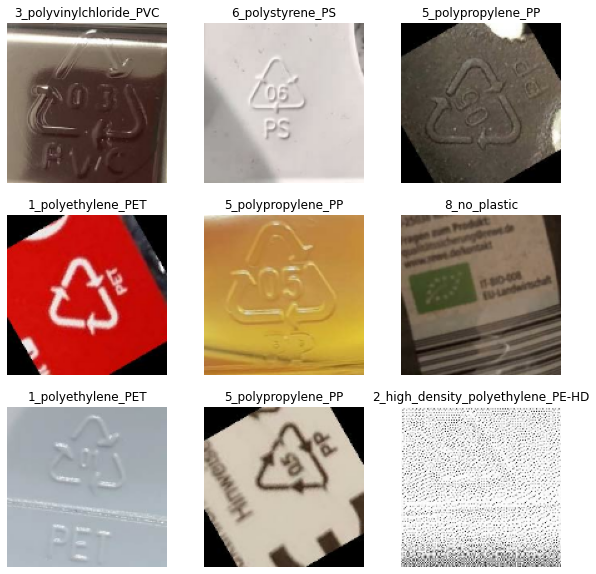

In [10]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
from tensorflow.keras import regularizers

In [32]:
model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255),
        Conv2D(16, 3, activation='relu', padding='SAME',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.DepthwiseConv2D(8, 3, activation='relu', padding='SAME',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        MaxPooling2D(pool_size=(2, 2)),
        #tf.keras.layers.DepthwiseConv2D(8, 3, activation='relu', padding='SAME'),
        #tf.keras.layers.DepthwiseConv2D(8, 3, activation='relu', padding='SAME'),
        #MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=8, activation='softmax'),
    ])

In [33]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [34]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=batch_size)

Epoch 1/50
13/13 [==============================] - 2s 85ms/step - loss: 2.0694 - accuracy: 0.1646 - val_loss: 2.0388 - val_accuracy: 0.1550
Epoch 2/50
13/13 [==============================] - 2s 80ms/step - loss: 2.0258 - accuracy: 0.1814 - val_loss: 1.9926 - val_accuracy: 0.1964
Epoch 3/50
13/13 [==============================] - 1s 75ms/step - loss: 1.9829 - accuracy: 0.2208 - val_loss: 1.9399 - val_accuracy: 0.2351
Epoch 4/50
13/13 [==============================] - 2s 80ms/step - loss: 1.9314 - accuracy: 0.2402 - val_loss: 1.9552 - val_accuracy: 0.1835
Epoch 5/50
13/13 [==============================] - 1s 72ms/step - loss: 1.9099 - accuracy: 0.2473 - val_loss: 1.9030 - val_accuracy: 0.2248
Epoch 6/50
13/13 [==============================] - 1s 75ms/step - loss: 1.8487 - accuracy: 0.2763 - val_loss: 1.8592 - val_accuracy: 0.2894
Epoch 7/50
13/13 [==============================] - 2s 80ms/step - loss: 1.8101 - accuracy: 0.3092 - val_loss: 1.8504 - val_accuracy: 0.2817
Epoch 8/50
13

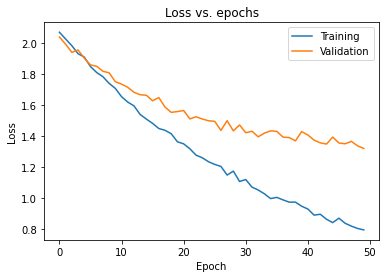

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

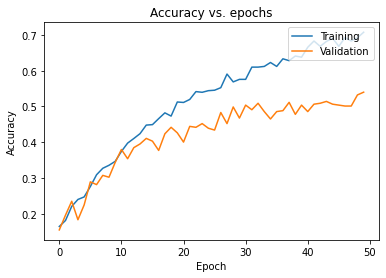

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [37]:
model.save("plasitcnet.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("plasitcnet_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("plasitcnet_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpfsyt1byu/assets


Model is 70912 bytes


In [ ]:
!apt-get install xxd

In [39]:
!echo "const unsigned char model[] = {" > ./model.h
!cat plasitcnet_model.tflite | xxd -i      >> ./model.h
!echo "};"                              >> ./model.h
import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 437,326 bytes.
